In [17]:
#import the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [18]:
train = pd.read_csv("train.csv")
stores = pd.read_csv("stores.csv")
features = pd.read_csv("features.csv")

In [19]:
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [20]:
new_data = pd.merge(features,train,on=["Date","IsHoliday","Store"],how="inner")
train_data = pd.merge(stores,new_data,on=["Store"],how="inner")

train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Type          421570 non-null  object 
 2   Size          421570 non-null  int64  
 3   Date          421570 non-null  object 
 4   Temperature   421570 non-null  float64
 5   Fuel_Price    421570 non-null  float64
 6   MarkDown1     150681 non-null  float64
 7   MarkDown2     111248 non-null  float64
 8   MarkDown3     137091 non-null  float64
 9   MarkDown4     134967 non-null  float64
 10  MarkDown5     151432 non-null  float64
 11  CPI           421570 non-null  float64
 12  Unemployment  421570 non-null  float64
 13  IsHoliday     421570 non-null  bool   
 14  Dept          421570 non-null  int64  
 15  Weekly_Sales  421570 non-null  float64
dtypes: bool(1), float64(10), int64(3), object(2)
memory usage: 51.9+ MB


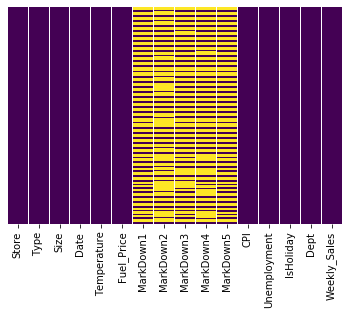

In [21]:
sns.heatmap(train_data.isnull(),cbar=False,yticklabels=False,cmap="viridis")

In [22]:
#fill in null values

train_data.fillna(0,inplace=True)

In [23]:
train_data.head()

,Store,Type,Size,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales
0,1,A,151315,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,1,24924.50
1,1,A,151315,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,2,50605.27
2,1,A,151315,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,3,13740.12
3,1,A,151315,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,4,39954.04
4,1,A,151315,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,5,32229.38


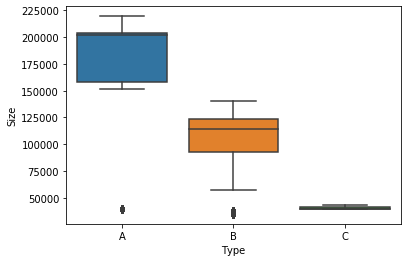

In [24]:
sns.boxplot("Type","Size",data=train_data)

In [25]:
store_type = pd.get_dummies(train_data["Type"])
train_data.drop(["Type", 'MarkDown2', 'MarkDown4'],axis=1,inplace=True)
train_data.head()

,Store,Size,Date,Temperature,Fuel_Price,MarkDown1,MarkDown3,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales
0,1,151315,2010-02-05,42.31,2.572,0.0,0.0,0.0,211.096358,8.106,False,1,24924.50
1,1,151315,2010-02-05,42.31,2.572,0.0,0.0,0.0,211.096358,8.106,False,2,50605.27
2,1,151315,2010-02-05,42.31,2.572,0.0,0.0,0.0,211.096358,8.106,False,3,13740.12
3,1,151315,2010-02-05,42.31,2.572,0.0,0.0,0.0,211.096358,8.106,False,4,39954.04
4,1,151315,2010-02-05,42.31,2.572,0.0,0.0,0.0,211.096358,8.106,False,5,32229.38


In [26]:
train_data = pd.concat([train_data,store_type],axis=1)

train_data["Date"] = pd.to_datetime(train_data["Date"])
train_data["Month"] = train_data["Date"].dt.month

train_data.drop(["Date"],axis=1,inplace=True)

train_data.head()

,Store,Size,Temperature,Fuel_Price,MarkDown1,MarkDown3,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales,A,B,C,Month
0,1,151315,42.31,2.572,0.0,0.0,0.0,211.096358,8.106,False,1,24924.50,1,0,0,2
1,1,151315,42.31,2.572,0.0,0.0,0.0,211.096358,8.106,False,2,50605.27,1,0,0,2
2,1,151315,42.31,2.572,0.0,0.0,0.0,211.096358,8.106,False,3,13740.12,1,0,0,2
3,1,151315,42.31,2.572,0.0,0.0,0.0,211.096358,8.106,False,4,39954.04,1,0,0,2
4,1,151315,42.31,2.572,0.0,0.0,0.0,211.096358,8.106,False,5,32229.38,1,0,0,2


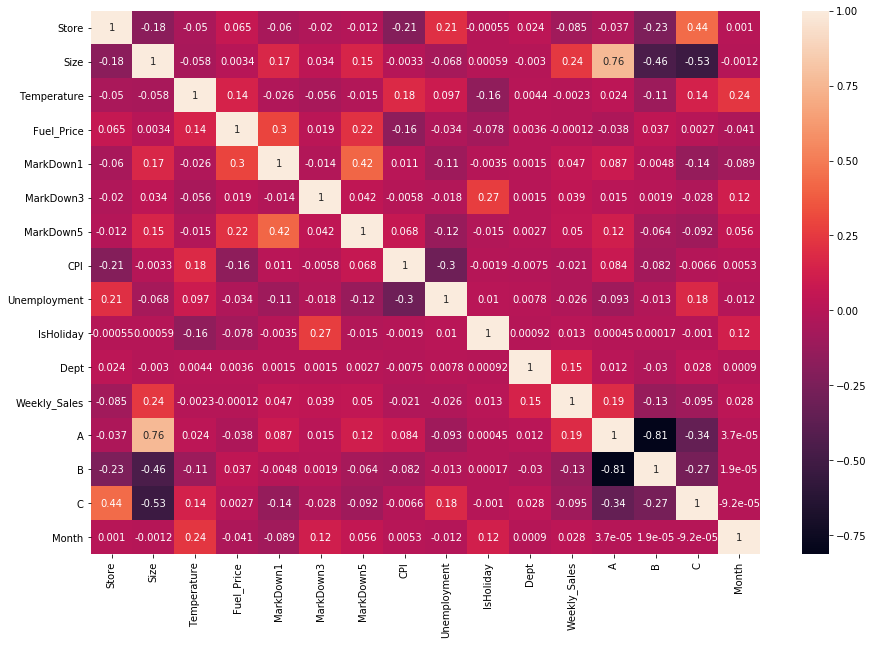

In [27]:
#show correlation of dataset

plt.figure(figsize=(15,10))
sns.heatmap(train_data.corr(),annot = True)

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

In [29]:
#scale train data

scaler = MinMaxScaler()
scaler.fit(train_data.drop(["Weekly_Sales"],axis=1))
scaled_features = scaler.transform(train_data.drop(["Weekly_Sales"],axis=1))

scaled_features = pd.DataFrame(scaled_features,columns=[['Store', 'Size', 'Temperature', 'Fuel_Price', 'MarkDown1', 
                                                         'MarkDown3','MarkDown5',"CPI","Unemployment",
                                                         'IsHoliday', 'Dept', 'A', 'B', 'C', 'Month']])

lin_model = LinearRegression()
rfc = RandomForestRegressor()
gbr = GradientBoostingRegressor()
dtree = DecisionTreeRegressor()

models = [lin_model, rfc, gbr, dtree]

In [30]:
X = scaled_features
y = train_data["Weekly_Sales"]
scaled_features.head()

,Store,Size,Temperature,Fuel_Price,MarkDown1,MarkDown3,MarkDown5,CPI,Unemployment,IsHoliday,Dept,A,B,C,Month
0,0.0,0.630267,0.434149,0.0501,0.0,0.000205,0.0,0.8405,0.405118,0.0,0.000000,1.0,0.0,0.0,0.090909
1,0.0,0.630267,0.434149,0.0501,0.0,0.000205,0.0,0.8405,0.405118,0.0,0.010204,1.0,0.0,0.0,0.090909
2,0.0,0.630267,0.434149,0.0501,0.0,0.000205,0.0,0.8405,0.405118,0.0,0.020408,1.0,0.0,0.0,0.090909
3,0.0,0.630267,0.434149,0.0501,0.0,0.000205,0.0,0.8405,0.405118,0.0,0.030612,1.0,0.0,0.0,0.090909
4,0.0,0.630267,0.434149,0.0501,0.0,0.000205,0.0,0.8405,0.405118,0.0,0.040816,1.0,0.0,0.0,0.090909


In [15]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

In [31]:
#train data 

for model in models:
    model.fit(X_train, y_train)
    predictions = model.predict(X_val)
    print(r2_score(y_val,predictions))

0.09109874659054418
0.9631341441264596
0.7395616291323039
0.9297954721676339


The Random Forest Regressor had the highest regression score, so we will use it on our test data. 

In [32]:
#load in test data, fill in null values

test = pd.read_csv("test.csv")

data = pd.merge(features,test,how="inner",on=["Date","IsHoliday","Store"])
test_data = pd.merge(stores,data,on=["Store"],how="inner")

store_type = pd.get_dummies(test_data["Type"])
test_data = pd.concat([test_data,store_type],axis=1)
test_data.drop(["Type","MarkDown2","MarkDown4"],axis=1,inplace=True)

test_data["Date"] = pd.to_datetime(test_data["Date"])
test_data["Month"] = test_data["Date"].dt.month
test_date = test_data["Date"]
test_data.drop(["Date"],axis=1,inplace=True)

test_data.fillna(0,inplace=True)

#scale test data

scaler = MinMaxScaler()
scaler.fit(test_data)
scaled_features = scaler.transform(test_data)

scaled_features = pd.DataFrame(scaled_features,columns=[['Store', 'Size', 'Temperature', 'Fuel_Price', 'MarkDown1', 
                                                         'MarkDown3','MarkDown5',"CPI","Unemployment",
                                                         'IsHoliday', 'Dept', 'A', 'B', 'C', 'Month']])


In [33]:
pred_i = rfc.predict(scaled_features)

In [34]:
#creating output file and matching it to sampleSubmission.csv

test_data["weeklySales"] = pred_i
test_data["Date"] = test_date
test_data["id"] = test_data["Store"].astype(str) + "_" + test_data["Dept"].astype(str) + "_" + test_data["Date"].astype(str)

output = pd.DataFrame(test_data[["id","weeklySales"]],columns=["id","weeklySales"])
output.to_csv("my_output.csv",index=False)